In [2]:
from PIL import Image, ImageFilter
import numpy as np
from helper import hist, sp_noise # my lib for plot hist and add noisy
from itertools import repeat

In [3]:
path = 'img_in/dan-smedley-j4OEr2IMBOs-unsplash.jpg' # path to file
img = Image.open(path) # read image 
img_arr = np.array(img) # Image.Image -> np.ndarray

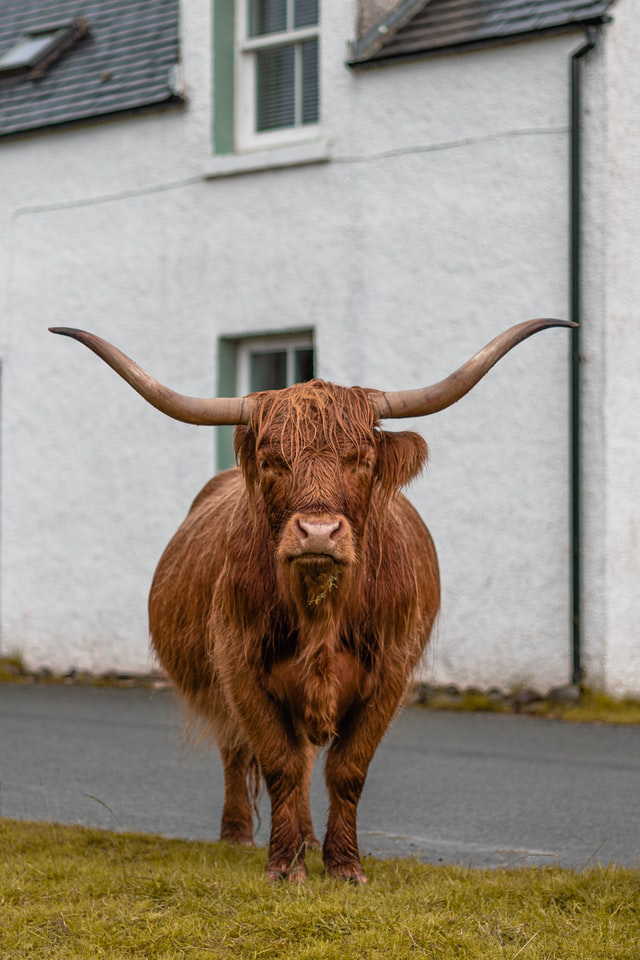

In [4]:
img # show image

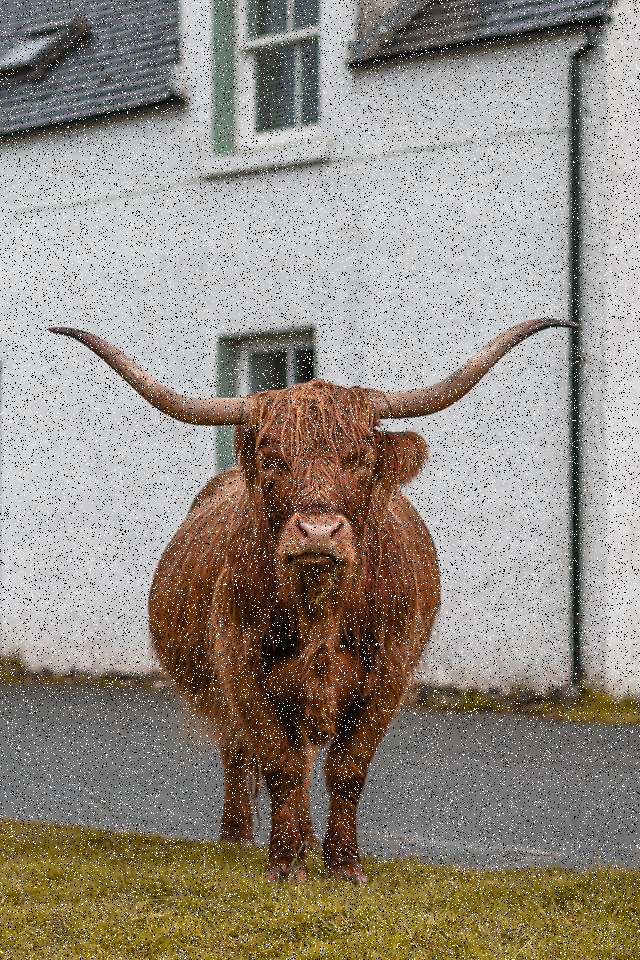

In [5]:
noisyImg = sp_noise(img,0.05) # add noisy
noisyImg # show image

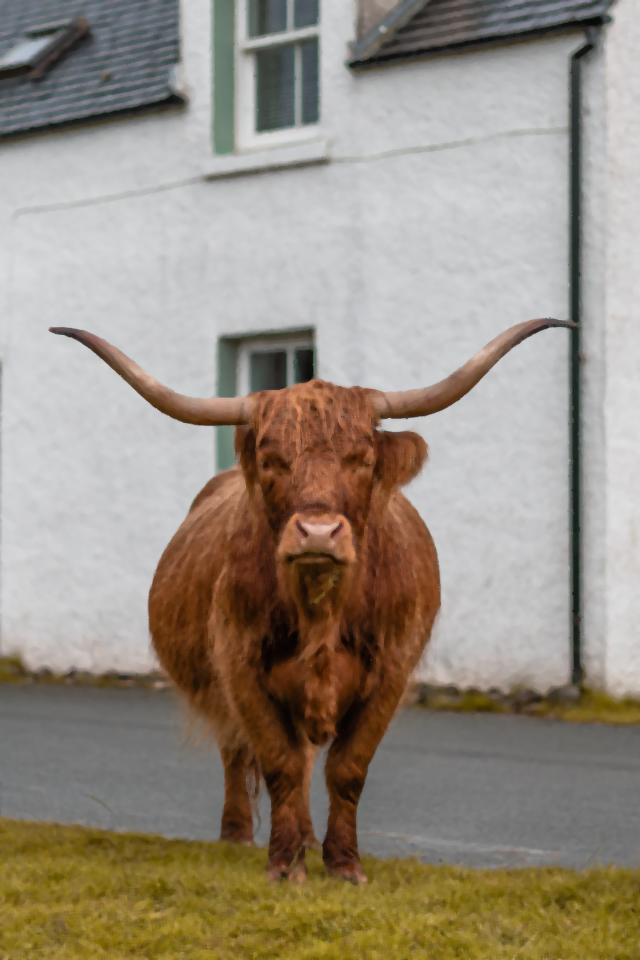

In [6]:
# clear image with PIL.ImageFilter.MedianFilter, kernal size = 3
clearimg = noisyImg.filter(ImageFilter.MedianFilter(size=5)) 
clearimg 

In [7]:
kernal = np.array([
    [1,0,0,0,1],
    [0,2,0,2,0],
    [0,0,3,0,0],
    [0,2,0,2,0],
    [1,0,0,0,1]
])

In [11]:
def medianFilter(img: Image.Image, kernal:np.ndarray):
    img = np.array(img)
    output = np.copy(img)
#     hist_img = np.histogram(img.ravel(), bins=257)
    windows = []
    for i in range(img.shape[0]-kernal.shape[0]+1):
        for j in range(img.shape[1]-kernal.shape[1]+1):
            window = img[i:i+kernal.shape[0],j:j+kernal.shape[1],:]
            windows.append(window)
            for k in range(img.shape[2]):
                win_fl = window[:,:,k].flatten()
                temp = []
                for h in range(len(win_fl)):
                    temp.extend(repeat(win_fl[h], kernal.flatten()[h]))
                output[i,j,k]=weighted_median(np.sort(temp, axis=None), kernal.ravel())
                
    return Image.fromarray(output)

In [12]:
def weighted_median(data, weights):
    """
    Args:
      data (list or numpy.array): data
      weights (list or numpy.array): weights
    """
    data, weights = np.array(data).squeeze(), np.array(weights).squeeze()
    s_data, s_weights = map(np.array, zip(*sorted(zip(data, weights))))
    midpoint = 0.5 * sum(s_weights)
    if any(weights > midpoint):
        w_median = (data[weights == np.max(weights)])[0]
    else:
        cs_weights = np.cumsum(s_weights)
        idx = np.where(cs_weights <= midpoint)[0][-1]
        if cs_weights[idx] == midpoint:
            w_median = np.mean(s_data[idx:idx+2])
        else:
            w_median = s_data[idx+1]
    return w_median

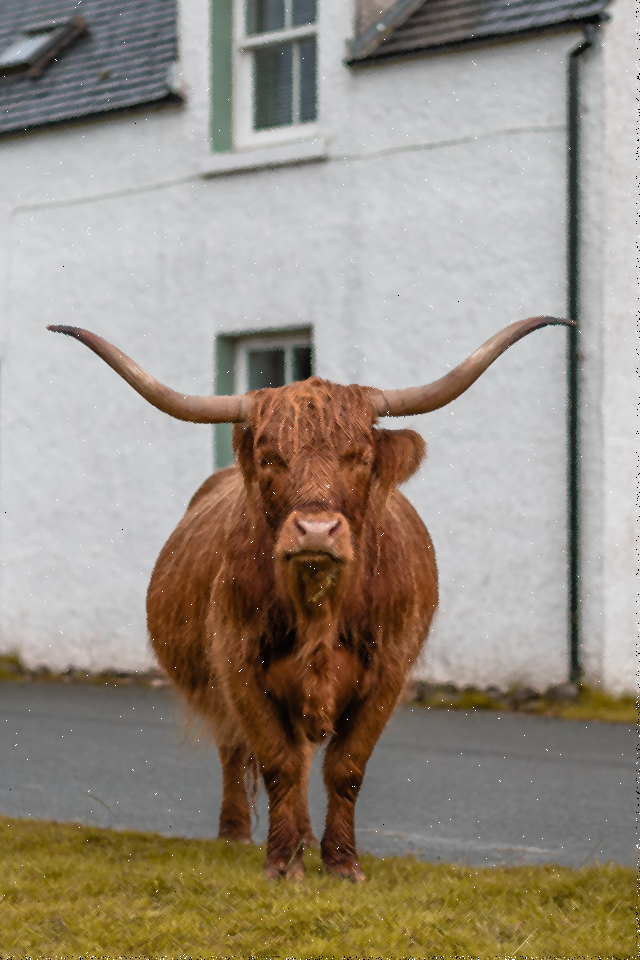

In [13]:
medianFilter(noisyImg, kernal)